<a href="https://colab.research.google.com/github/achri19/DeltaXWorkshop_Field/blob/main/ADCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Delta-X Workshop**

## **Module 4**

## **Accoustic Doppler Current Profiler:**
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1939

Christensen, A.L., J.M. Mallard, and J. Nghiem. 2021. Delta-X: Acoustic Doppler Current Profiler Channel Surveys, Coastal Louisiana, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1939




ADCPs are used to measure discharge within a channel using velocity profiles along a transect perpendicular to flow. 

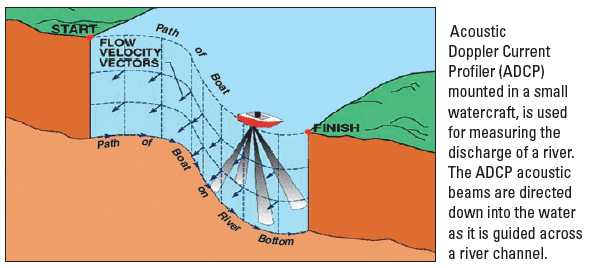

First, we will import necessary packages. We will need to pip install rasterio for those working in Google Colab.

If you're using Google Colab, you'll need to pip install a few packages and grant access to your Google Drive. 


In [ ]:
#!pip install rasterio
import rasterio
import rasterio.plot
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import string

#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Then, we set our working directory and import a basemap, which should be located in your working directory.

In [ ]:
input_dir = '/content/drive/My Drive/Untitled Folder/'
output_dir = input_dir + 'Output'
#Should change output directory to personal drive so everyone will have files at the end of the workshop


basemap = rasterio.open(input_dir + 'basemap.tif')

Open the ADCP summary file and print the first few lines to get an idea of what the data look like.

In [ ]:
summary_file = pd.read_csv(input_dir + "DeltaX_ADCP_Measurements_1939/data/DeltaX_RiverDischarge_Spring2021.csv")

summary_file.head()

,basin,campaign,transect,location,site_name,replicate,planned_latitude,planned_longitude,start_date,start_time,...,boat_speed,mean_speed,discharge_side,discharge_top,discharge_middle,discharge_bottom,discharge_total,flow_direction,filename,profiler_id
0,Atchafalaya,Spring 2021,0,ATCH-ICWW,ICWW-A,1,29.644505,-91.368047,20210326,13:44:29,...,0.94,0.51,2.22,46.27,338.36,43.01,429.86,284.38,ADCP_20210326-091705_ATCH-ICWW_ICWW-A_000_Rep1...,Teledyne RiverPro
1,Atchafalaya,Spring 2021,0,ATCH-ICWW,ICWW-A,2,29.644505,-91.368047,20210326,13:47:58,...,0.86,0.54,5.65,43.49,324.22,42.86,416.22,286.02,ADCP_20210326-091705_ATCH-ICWW_ICWW-A_000_Rep2...,Teledyne RiverPro
2,Atchafalaya,Spring 2021,1,ATCH-ICWW,ICWW-A,1,29.644505,-91.368047,20210326,13:52:42,...,1.37,0.52,1.89,45.62,329.32,43.42,420.25,282.66,ADCP_20210326-095611_ATCH-ICWW_ICWW-A_001_Rep1...,Teledyne RiverPro
3,Atchafalaya,Spring 2021,1,ATCH-ICWW,ICWW-A,2,29.644505,-91.368047,20210326,13:55:03,...,1.25,0.50,3.05,43.69,317.87,42.42,407.02,287.21,ADCP_20210326-095611_ATCH-ICWW_ICWW-A_001_Rep2...,Teledyne RiverPro
4,Atchafalaya,Spring 2021,2,ATCH-ICWW,ICWW-B,1,29.640151,-91.319836,20210326,14:11:20,...,0.90,0.56,2.08,41.82,360.92,45.77,450.59,263.08,ADCP_20210326-100220_ATCH-ICWW_ICWW-B_002_Rep1...,Teledyne RiverPro


We will start by finding the average discharge at each site location and mapping them on top of our basemap.


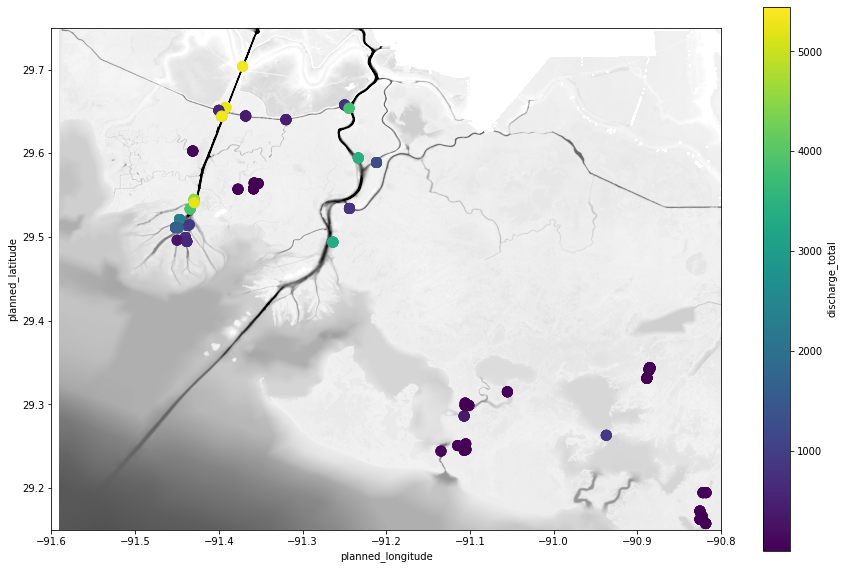

In [ ]:
means = summary_file.groupby(['site_name'])['discharge_total'].mean()

fig, ax = plt.subplots(figsize=(15,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([-91.6, -90.8, 29.15, 29.75])

summary_file.plot(x="planned_longitude", y="planned_latitude",ax=ax,kind="scatter",s=100,c="discharge_total",cmap="viridis")


Next, we will compare discharge value along one channel, the Wax Lake Outlet.



                  mean         std
site_name                         
WLO-A      5300.569167   91.090140
WLO-C      5228.963125  200.776176
WLO-D      4628.926875  217.915005
WLO-E      3918.138750  195.946293


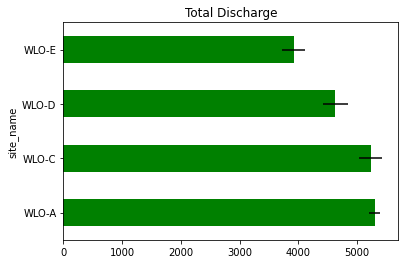

In [ ]:
WLO = summary_file[summary_file['site_name'].str.contains('|'.join(['WLO-A','WLO-C','WLO-D','WLO-E']))]

qual = WLO.groupby(['site_name'])['discharge_total'].agg([np.mean, np.std])
qual.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Total Discharge", color='green', ylabel='Total Discharge (m3/s)')
print(qual)

Hydrology in the Wax Lake Delta is strongly influenced by discharge in the Wax Lake Outlet and Atchafalaya River. However, tides can also impact discharge in this channel. These transects were collected within a week of each other and discharge values can vary by +/-200m3/s. Some of this is variation from instrument and collection methods, but some is due to changes in discharge at different tidal stages.

If you want to explore how discharge varies, try subsetting the data by date and time and compare discharge values.

You can check offshore tides from the NOAA Amerada Pass tide gauge:



> https://tidesandcurrents.noaa.gov/waterlevels.html?id=8764227&units=metric&bdate=20210325&edate=20210401&timezone=LST/LDT&datum=NAVD&interval=6&action=




We will look at an example from high tide on 3/26/2021 between 1:30 and 3pm. 

               mean         std
site_name                      
WLO-A      5257.715   95.890751
WLO-C      5233.285   12.310729
WLO-D      5072.625  107.063038
WLO-E      4201.330    8.188297


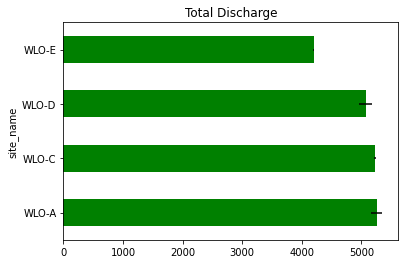

In [ ]:
WLO_0327 = WLO[(pd.to_datetime(WLO['start_date'].astype('string') + " " +WLO['start_time'])<'03-27-2021 15:30:00')]
qual = WLO_0327.groupby(['site_name'])['discharge_total'].agg([np.mean, np.std])
qual.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Total Discharge", color='green', ylabel='Total Discharge (m3/s)')
print(qual)

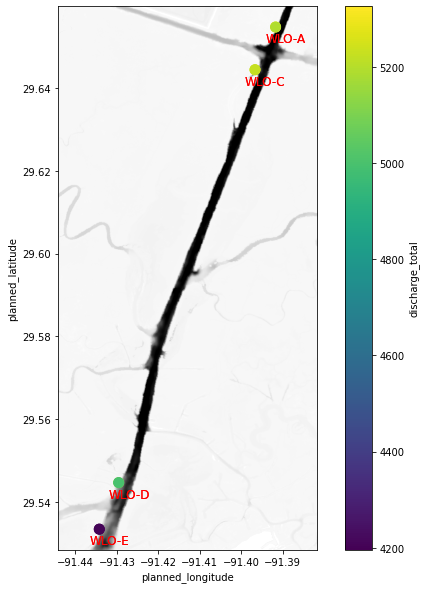

In [ ]:
xmin = np.min(WLO_0327['planned_longitude'])
ymin = np.min(WLO_0327['planned_latitude'])
xmax = np.max(WLO_0327['planned_longitude'])
ymax = np.max(WLO_0327['planned_latitude'])

fig, ax = plt.subplots(figsize=(10,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-20,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([xmin-0.01, xmax+0.01, ymin-0.005, ymax+0.005])
WLO_0327.plot(x="planned_longitude", y="planned_latitude",s=100, ax=ax,c = 'discharge_total',kind="scatter",cmap = 'viridis')

for k, v in WLO_0327.iterrows():
    ax.annotate(v['site_name'],[v['planned_longitude'],v['planned_latitude']],
               xytext=(-10,-15), textcoords='offset points',
               family='sans-serif', fontsize=12, color='red')

There is a slight decrease in discharge from upstream to downstream, indicating exchange between the outlet and side channels or marshes. 

A few things to notice:


*   You'll notice there is very little difference between WLO-A and WLO-C despite being on opposite sides of the Intracoastal Wateway. 
*   The decrease in discharge betweewn WLO-D and WLO-E is ~750m3/s, which suggests the discharge through Crewboat Channel is 750m3/s.






In [ ]:
CRMS0421 = summary_file[summary_file['site_name'].str.contains('CRMS0421')]


In [ ]:
CRMS0421 = summary_file[summary_file['site_name'].str.contains('CRMS0421')]
xmin = np.min(CRMS0421['planned_longitude'])
ymin = np.min(CRMS0421['planned_latitude'])
xmax = np.max(CRMS0421['planned_longitude'])
ymax = np.max(CRMS0421['planned_latitude'])

fig, ax = plt.subplots(figsize=(10,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-1,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([xmin-0.01, xmax+0.01, ymin-0.005, ymax+0.005])
import string
CRMS0421.plot(x="planned_longitude", y="planned_latitude", ax=ax,kind="scatter")

for k, v in CRMS0421.iterrows():
    ax.annotate(v['site_name'],[v['planned_longitude'],v['planned_latitude']],
               xytext=(-10,-15), textcoords='offset points',
               family='sans-serif', fontsize=10, color='black')

In [ ]:
means = CRMS0421.groupby(['site_name'])['discharge_total'].mean()
stdevs = CRMS0421.groupby(['site_name'])['discharge_total'].std()

<AxesSubplot:title={'center':'Total Discharge'}, ylabel='site_name'>

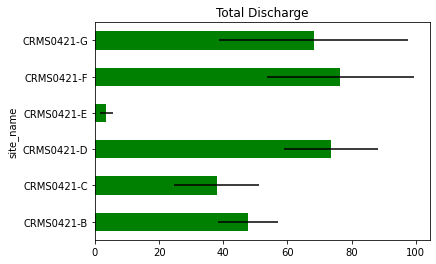

In [ ]:
qual = CRMS0421.groupby(['site_name'])['discharge_total'].agg([np.mean, np.std])

qual.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Total Discharge", color='green', ylabel='Total Discharge (m3/s)')

If we look at a particular collection period, where transects are measured within the same time period, we can compare discharge values along a channel to estimate flow of water through the marshes. 



In [ ]:
CRMS0421_first = CRMS0421[pd.to_datetime(CRMS0421['start_date'].astype('string') + " " +CRMS0421['start_time'])<'04-06-2021 16:0:00']


In [ ]:
CRMS0421_first.groupby(['site_name'])['discharge_total'].mean()


site_name
CRMS0421-B    33.2880
CRMS0421-C    19.5755
CRMS0421-D    69.5555
CRMS0421-E     3.4100
CRMS0421-F    83.9720
CRMS0421-G    85.0510
Name: discharge_total, dtype: float64

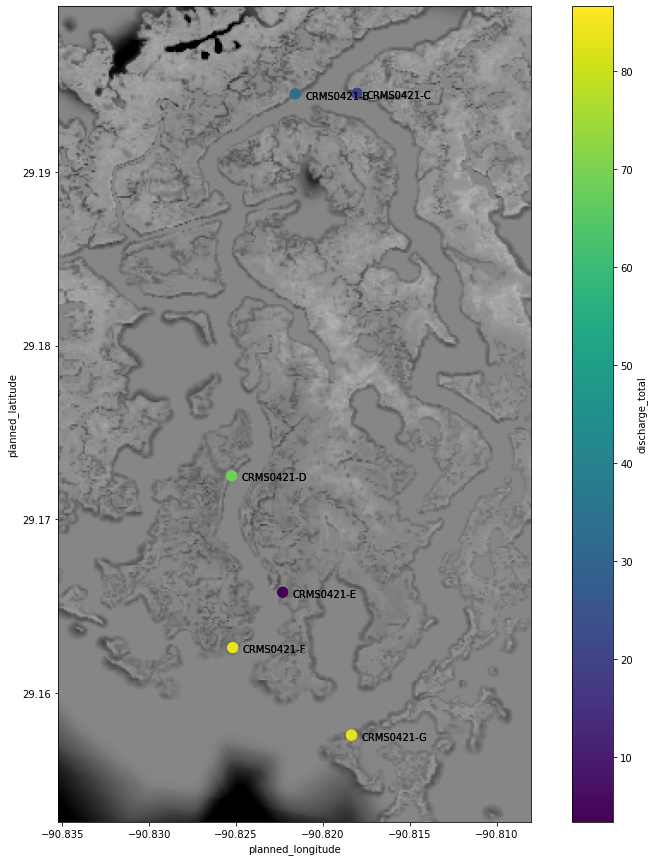

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-1,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([xmin-0.01, xmax+0.01, ymin-0.005, ymax+0.005])
import string
CRMS0421_first.plot(x="planned_longitude", y="planned_latitude",ax=ax,kind="scatter",s=100,c="discharge_total",cmap="viridis")

for k, v in CRMS0421_first.iterrows():
    ax.annotate(v['site_name'],[v['planned_longitude'],v['planned_latitude']],
               xytext=(10,-5), textcoords='offset points',
               family='sans-serif', fontsize=10, color='black')

Transect B, D, and F occur along the same channel. Changes in discharge from upstream to downstream would indicate flow into or out of the adjacent marshes. 
Flow goes from 33 m3/s at transect B, to 70 m3/s at transect D, to 85 m3/s at transect F. 

At this time, the tide is rising, meaning water is most likely flowing north. Therefore, this could indicate that 15m3/s moves from channels to marshes between transect F and transect D and 36 m3/s moves from channels to marshes between transect D and B.




In addition to discharge data, the ADCP dataset also includes channel cross-section data. For the spring dataset, each transect comes with an individual files that contain river depth measurements across the entire transect.


We will compare two different channel cross-sections: WLO-A and 



In [ ]:
WLOA = pd.read_csv(input_dir + "DeltaX_ADCP_Measurements_1939/data/ADCP_20210327-114623_WLO_WLO-A_010_Rep1_Bathy.csv")
WLOFanC = pd.read_csv(input_dir + "DeltaX_ADCP_Measurements_1939/data/ADCP_20210327-145101_WLO_WLO-Fan-C_017_Rep1_Bathy.csv")

WLOA.head()

,ensemble,date,time,distance_traveled_m,river_depth_m,latitude,longitude
0,19,20210327,17:41:28,0.000000,2.653026,29.654580,-91.391646
1,20,20210327,17:41:29,0.043972,2.642691,29.654578,-91.391640
2,21,20210327,17:41:29,0.078958,2.637860,29.654578,-91.391640
3,22,20210327,17:41:30,0.110443,2.657876,29.654575,-91.391635
4,23,20210327,17:41:31,0.170686,2.652348,29.654571,-91.391630


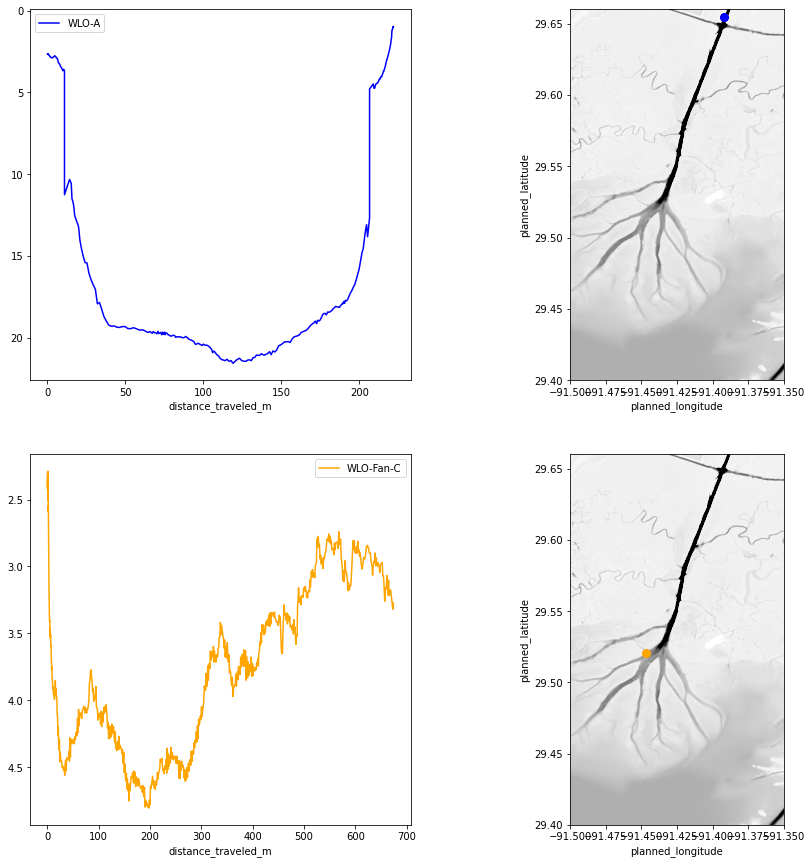

In [ ]:
fig,[[ax1,ax1b],[ax2,ax2b]] = plt.subplots(nrows=2,ncols=2,figsize = (20,15))

WLOA.plot(x="distance_traveled_m", y="river_depth_m",ax=ax1,kind="line",c='blue')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.legend(['WLO-A'])

rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax1b,cmap='Greys_r')
ax1b.axis([-91.5,-91.35,29.4,29.66])
summary_file[summary_file['site_name']=='WLO-A'].plot(x="planned_longitude", y="planned_latitude",ax=ax1b,kind="scatter",s=50,c="blue")

WLOFanC.plot(x="distance_traveled_m", y="river_depth_m",ax=ax2,kind="line",c='orange')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.legend(['WLO-Fan-C'])

rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax2b,cmap='Greys_r')
ax2b.axis([-91.5,-91.35,29.4,29.66])
summary_file[summary_file['site_name']=='WLO-Fan-C'].plot(x="planned_longitude", y="planned_latitude",ax=ax2b,kind="scatter",s=50,c="orange")







Notice how different channel shapes are when comparing the main channel (WLO-A) and the deltaic channels (WLO-Fan-C). You can explore these further by importing different channels.

Future datasets will also include velocity profiles of each transect. You'll be able to find those in the ORNL archive in the next few months.